# **ETPoF** Homework 2
Annemarie Linnenbank & Tommie Verouden

*8 March 2024*

## Part a: Optical Calibration (13 points)
### 1a1) **Image resolution**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import scipy.spatial as spatial

%matplotlib widget

https://docs.opencv.org/4.6.0/d9/d0c/group__calib3d.html#ga7f02cd21c8352142890190227628fa80

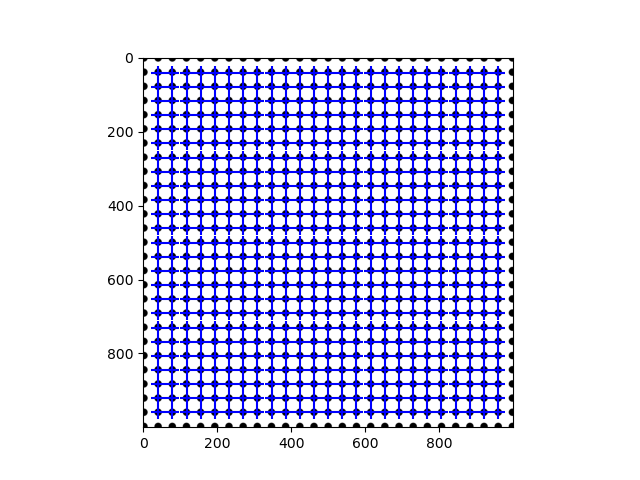

In [12]:
# Define calibration parameters
grid_size_x = 25
grid_size_y = 25
calibration_distance = 5 # mm

# Import image Clean.png
img = cv.imread('Images/Calibration_a/Clean.png', 0)

# Find circle grid using opencv
ret, centers = cv.findCirclesGrid(img, (grid_size_x,grid_size_y), flags=cv.CALIB_CB_SYMMETRIC_GRID)
plt.imshow(img, cmap='gray')
plt.scatter(centers[:,0,0], centers[:,0,1], c='b', s=100, marker='+')
plt.show()

# plt.xlim(0,100)
# plt.ylim(100,0)

In [13]:
centers = centers.reshape(-1,2)
distances_pix = spatial.distance.cdist(centers, centers, 'euclidean')

In [14]:
distances_real = np.indices([grid_size_x,grid_size_y]).T
distances_real = np.reshape(distances_real,(grid_size_x * grid_size_y,2))


distances_real = spatial.distance.cdist(distances_real, distances_real, 'euclidean')
distances_real = calibration_distance * distances_real


In [19]:
with np.errstate(divide='ignore', invalid='ignore'):
    resolution = distances_real/distances_pix

How to weigh the distances?
Since the error goes down with 1/distance, we can just weigh the points by distance.


In [17]:
# Calculate mean resolution weighted
def weighted_avg_and_std(values, mask, weights):
    average = np.average(values[mask], weights=weights[mask])
    variance = np.average((values[mask]-average)**2, weights=weights[mask])
    return (average, np.sqrt(variance))

resolution_av, resolution_std = weighted_avg_and_std(resolution, mask, distances_real)


In [11]:
resolution[:,:].reshape(9,3,3)

array([[[       nan, 0.13043558, 0.13043553],
        [0.13050361, 0.13043553, 0.1304764 ],
        [0.13055915, 0.13056296, 0.13052767]],

       [[0.13043558,        nan, 0.13043547],
        [0.13050363, 0.13043547, 0.13050363],
        [0.13055873, 0.13059486, 0.13055871]],

       [[0.13043553, 0.13043547,        nan],
        [0.13047636, 0.13043547, 0.13050361],
        [0.13052767, 0.13056294, 0.13055915]],

       [[0.13050361, 0.13050363, 0.13047636],
        [       nan, 0.13050361, 0.13050363],
        [0.13061473, 0.13059483, 0.13054713]],

       [[0.13043553, 0.13043547, 0.13043547],
        [0.13050361,        nan, 0.13050361],
        [0.13061999, 0.13075463, 0.13061994]],

       [[0.1304764 , 0.13050363, 0.13050361],
        [0.13050363, 0.13050361,        nan],
        [0.13054718, 0.13059483, 0.13061473]],

       [[0.13055915, 0.13055873, 0.13052767],
        [0.13061473, 0.13061999, 0.13054718],
        [       nan, 0.13055696, 0.13055693]],

       [[0.13056296,